#### The next objective is to check which Services affect the customer's LTV.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [2]:
conn= sqlite3.connect('churn.db')

In [3]:
df= pd.read_sql('select * from churn_all', conn)

In [4]:
notchurn_df= pd.read_sql('select * from churn_all where Churn = "No"', conn)

In [5]:
churn_df= pd.read_sql('select * from churn_all where Churn = "Yes"', conn)

In [6]:
# Converting TotalCharges to numeric
churn_df.TotalCharges.replace(' ','0',inplace= True)    # replacing ' ' with zero

# Now converting datatype ot numeric 
churn_df.TotalCharges= pd.to_numeric(churn_df.TotalCharges)

In [9]:
df.Churn.value_counts()/df.Churn.shape

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [150]:
churn_df.head(3)

,customerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes


In [151]:
churn_df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'State', 'Latitude', 'Longitude', 'ZipCode', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Tenure', 'Contract', 'PaymentMethod', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [152]:
# Let's make separate dataframe of CHURNED customers as High value cust. &  Low value cust based on 80 percentile of their totalcharges.
high_value_customers= churn_df.query('TotalCharges > 2840.41 ')

low_value_customers= churn_df.query('TotalCharges < 2840.41 ')

### PhoneService

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

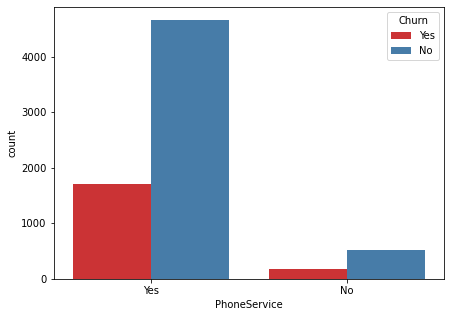

In [49]:
plt.figure(figsize=(7,5))
#sns.barplot(data= df,y='BP',x='AnxtyLH')
sns.countplot(x='PhoneService',data=df,hue='Churn',palette='Set1')

In [178]:
df.PhoneService.value_counts()
notchurn_df.PhoneService.value_counts()/notchurn_df.shape[0]

Yes    0.901044
No     0.098956
Name: PhoneService, dtype: float64

In [177]:
churn_df.PhoneService.value_counts()/churn_df.shape[0]

Yes    0.909042
No     0.090958
Name: PhoneService, dtype: float64

In [10]:
# Finding relation between PhoneService

low_value_customers.PhoneService.value_counts()/low_value_customers.PhoneService.shape

Yes    0.892308
No     0.107692
Name: PhoneService, dtype: float64

In [11]:
high_value_customers.PhoneService.value_counts()/high_value_customers.PhoneService.shape

Yes    0.975936
No     0.024064
Name: PhoneService, dtype: float64

Of the 20% (high-LTV) customers, only 2% did not use the phone service. 

On the other hand, for the customers in the 80% (low-LTV) group, 11% did not use the phone service.

This means that not having a phone can determine whether a customer is more likely to belong in the high-LTV or low-LTV group.

### Multiple Line (having PhoneService)

Text(0.5, 0, 'MULTIPLE LINES')

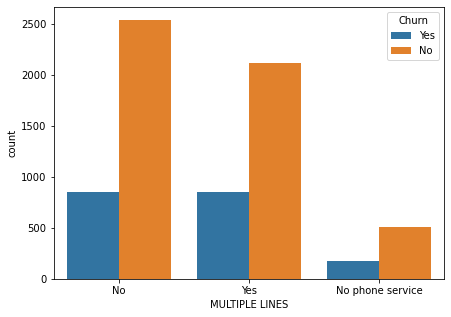

In [62]:
plt.figure(figsize=(7,5))
#sns.barplot(data= df,y='BP',x='AnxtyLH')
sns.countplot(x= 'MultipleLines',data=df,hue='Churn')
plt.xlabel('MULTIPLE LINES')

In [12]:
low_LTV_withPhoneService= low_value_customers.query('PhoneService == "Yes"')

In [13]:
low_LTV_withPhoneService.MultipleLines.value_counts()/low_LTV_withPhoneService.MultipleLines.shape[0]

No     0.590705
Yes    0.409295
Name: MultipleLines, dtype: float64

In [14]:
high_LTV_withPhoneService= high_value_customers.query(" PhoneService == 'Yes' ")

In [15]:
high_LTV_withPhoneService.MultipleLines.value_counts()/high_LTV_withPhoneService.shape[0]

Yes    0.832877
No     0.167123
Name: MultipleLines, dtype: float64

Among the customers in the high-LTV group who used the phone service, 83% used multiple lines.
On the contrary, of the customers in the low-LTV group, only 41% used multiple lines. 


### Internet Service

Text(0.5, 0, 'INTERNET SERVICES')

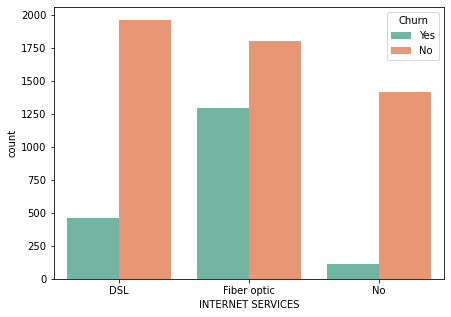

In [60]:
plt.figure(figsize=(7,5))
#sns.barplot(data= df,y='BP',x='AnxtyLH')
sns.countplot(x= 'InternetService',data=df,hue='Churn',palette='Set2')
plt.xlabel('INTERNET SERVICES')

In [157]:
churn_df.InternetService.value_counts()
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [158]:
# Internet Service of low LFTV customers
df.InternetService.value_counts()/df.InternetService.shape

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

In [17]:
# Internet Service of low LFTV customers
low_value_customers.InternetService.value_counts()/low_value_customers.InternetService.shape

Fiber optic    0.640803
DSL            0.283612
No             0.075585
Name: InternetService, dtype: float64

In [18]:
# Internet Service of high LFTV customers
high_value_customers.InternetService.value_counts()/high_value_customers.InternetService.shape

Fiber optic    0.906417
DSL            0.093583
Name: InternetService, dtype: float64

In the high-LTV group, All the customers used the internet service and 90% of them used a fiber optic connection.

On the other hand, among the low-LTV (80%) customers, 7.5% did not use the internet service and only 64% of them used a fiber optic connection. 

<AxesSubplot:xlabel='InternetService', ylabel='count'>

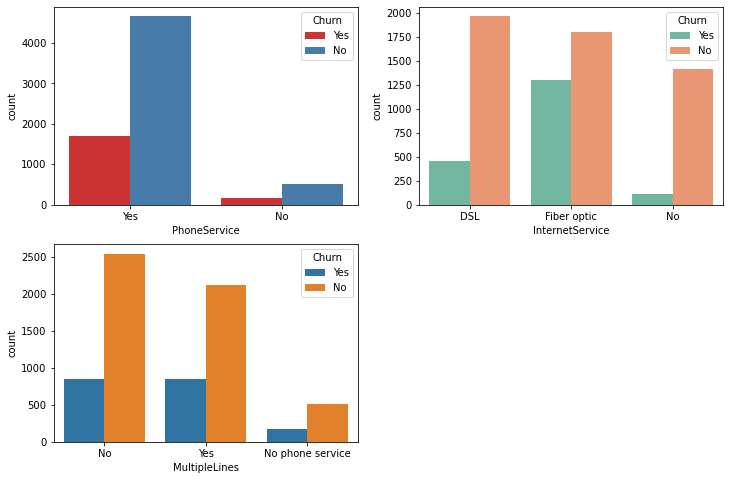

In [58]:
# CATE- NUM PLOT
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
#sns.barplot(data= df,y='BP',x='AnxtyLH')
sns.countplot(x='PhoneService',data=df,hue='Churn',palette='Set1')

plt.subplot(2,2,3)
#sns.barplot(data= df,y='Age',x='AnxtyLH')
sns.countplot(x='MultipleLines',data=df,hue='Churn')

plt.subplot(2,2,2)
#sns.barplot(data= df,x='DrugR',y='BP')
sns.countplot(x= 'InternetService',data=df,hue='Churn',palette='Set2')

#plt.subplot(2,2,4)
#sns.barplot(data= df,y='Age',x='DrugR')
#sns.histplot(x='Age',data=df,hue='DrugR',palette='Set1')

### Other SubServices
#### Percentage other subServices along with InternetService

In [130]:
InternetServices= df.query("InternetService != 'No' ")

In [131]:
df_percentage_Internet_subservices= np.array([InternetServices.query(" OnlineSecurity == 'Yes'").shape[0]/InternetServices.shape[0],
                                        InternetServices.query(" TechSupport == 'Yes'").shape[0]/InternetServices.shape[0],
                                         InternetServices.query(" OnlineBackup == 'Yes'").shape[0]/InternetServices.shape[0],
                                         InternetServices.query(" DeviceProtection == 'Yes'").shape[0]/InternetServices.shape[0],
                                         InternetServices.query(" StreamingTV == 'Yes'").shape[0]/InternetServices.shape[0],
                                         InternetServices.query(" StreamingMovies == 'Yes'").shape[0]/InternetServices.shape[0]])

In [132]:
# We have percentages as a numpy  array, storing it into list
df_percentage_Internet_subservices= df_percentage_Internet_subservices.tolist()

In [133]:
df_percentage_Internet_subservices

[0.36595976073953235,
 0.37049120899039334,
 0.44027551205365234,
 0.4390067065434113,
 0.4906652166032264,
 0.49519666485408737]

In [134]:
df_percentage_Internet_subservices= [i*100 for i in df_percentage_Internet_subservices]


In [135]:
df_percentage_Internet_subservices

[36.59597607395323,
 37.04912089903934,
 44.027551205365235,
 43.90067065434113,
 49.066521660322636,
 49.519666485408735]

In [136]:
internet_services= ['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'] 

In [137]:
IS_df= pd.DataFrame({'SERVICES_NAME': internet_services, 'Percentage_Usage': df_percentage_Internet_subservices})

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

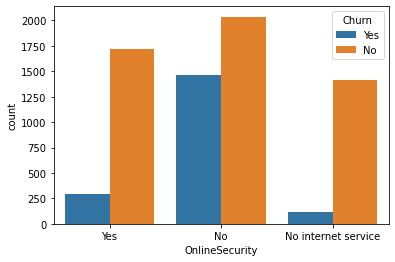

In [141]:
sns.countplot(df.OnlineSecurity, hue= df.Churn)

Text(0, 0.5, 'USAGE IN %')

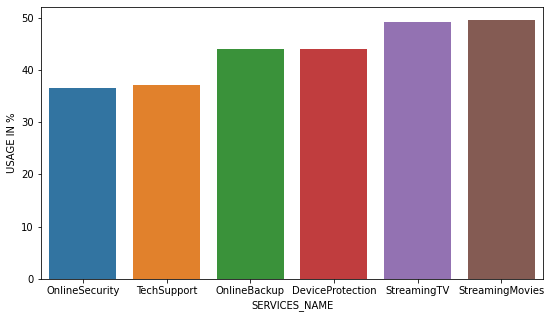

In [139]:
plt.figure(figsize= (9,5))
sns.barplot(x= IS_df.SERVICES_NAME, y= IS_df.Percentage_Usage)
plt.ylabel("USAGE IN %" )

In [153]:
low_LTV_withInternetService= low_value_customers.query("InternetService != 'No' ")

In [154]:
percetage_Internet_subservices= np.array([low_LTV_withInternetService.query(" OnlineSecurity == 'Yes'").shape[0]/low_LTV_withInternetService.shape[0],
                                        low_LTV_withInternetService.query(" TechSupport == 'Yes'").shape[0]/low_LTV_withInternetService.shape[0],
                                         low_LTV_withInternetService.query(" OnlineBackup == 'Yes'").shape[0]/low_LTV_withInternetService.shape[0],
                                         low_LTV_withInternetService.query(" DeviceProtection == 'Yes'").shape[0]/low_LTV_withInternetService.shape[0],
                                         low_LTV_withInternetService.query(" StreamingTV == 'Yes'").shape[0]/low_LTV_withInternetService.shape[0],
                                         low_LTV_withInternetService.query(" StreamingMovies == 'Yes'").shape[0]/low_LTV_withInternetService.shape[0]])

In [155]:
# We have percentages as a numpy  array, storing it into list
percentage_Internet_subservices= list(percetage_Internet_subservices)

In [156]:
percetage_Internet_subservices

array([0.1316932 , 0.13603473, 0.22720695, 0.23516643, 0.37698987,
       0.3813314 ])

In [34]:
IS_df= pd.DataFrame({'Service_name': internet_services, 'percentage_usage': percentage_Internet_subservices})
IS_df
#sns.countplot(percentage_Internet_subservices)

,Service_name,percentage_usage
0,OnlineSecurity,0.131693
1,TechSupport,0.136035
2,OnlineBackup,0.227207
3,DeviceProtection,0.235166
4,StreamingTV,0.376990
5,StreamingMovies,0.381331


In [29]:
import itertools
for (i,j) in zip(percetage_Internet_subservices,internet_services):
    print(f'percentage of low_LTV_customer availing {j} -> {i}')

percentage of low_LTV_customer availing OnlineSecurity -> 0.1316931982633864
percentage of low_LTV_customer availing TechSupport -> 0.13603473227206947
percentage of low_LTV_customer availing OnlineBackup -> 0.2272069464544139
percentage of low_LTV_customer availing DeviceProtection -> 0.23516642547033284
percentage of low_LTV_customer availing StreamingTV -> 0.37698986975397974
percentage of low_LTV_customer availing StreamingMovies -> 0.38133140376266283


In [36]:
high_LTV_withInternetService= high_value_customers.query("InternetService != 'No' ")

In [37]:
percetage_Internet_subservices_highLTV= np.array([high_LTV_withInternetService.query(" OnlineSecurity == 'Yes'").shape[0]/high_LTV_withInternetService.shape[0],
                                        high_LTV_withInternetService.query(" TechSupport == 'Yes'").shape[0]/high_LTV_withInternetService.shape[0],
                                         high_LTV_withInternetService.query(" OnlineBackup == 'Yes'").shape[0]/high_LTV_withInternetService.shape[0],
                                         high_LTV_withInternetService.query(" DeviceProtection == 'Yes'").shape[0]/high_LTV_withInternetService.shape[0],
                                         high_LTV_withInternetService.query(" StreamingTV == 'Yes'").shape[0]/high_LTV_withInternetService.shape[0],
                                         high_LTV_withInternetService.query(" StreamingMovies == 'Yes'").shape[0]/high_LTV_withInternetService.shape[0]])

In [38]:
percetage_Internet_subservices_highLTV= list(percetage_Internet_subservices_highLTV)

In [39]:
IS_df2= pd.DataFrame({'Service_name': internet_services, 'percentage_usage': percetage_Internet_subservices_highLTV})

<AxesSubplot:xlabel='Service_name', ylabel='percentage_usage'>

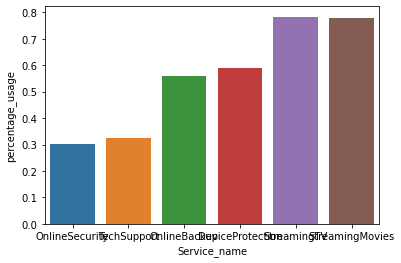

In [41]:
sns.barplot(x= IS_df2.Service_name, y= IS_df2.percentage_usage)

In [112]:
for (i,j) in zip(percetage_Internet_subservices_highLTV,internet_services):
    print(f'percentage of low_LTV_customer availing {j} -> {i}')

percentage of low_LTV_customer availing OnlineSecurity -> 0.30213903743315507
percentage of low_LTV_customer availing TechSupport -> 0.32620320855614976
percentage of low_LTV_customer availing OnlineBackup -> 0.5588235294117647
percentage of low_LTV_customer availing DeviceProtection -> 0.5882352941176471
percentage of low_LTV_customer availing StreamingTV -> 0.7834224598930482
percentage of low_LTV_customer availing StreamingMovies -> 0.7780748663101604


we were able to draw these conclusions:

About 80% of the customers in the top 20% use both streaming movies and streaming TV.
For the bottom 80%, this value is only about 40%.
This suggests that streaming TV and streaming movies are factors that could influence the LTVs of the customers.
Apart from this, we can also see a significant difference in the usage of device protection and online backup, which are being used by about 55% of the customers in the high-LTV group as opposed to only 22% in the low-LTV group.

### What is the proportion of kind of Contract Churned customers had?

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'CONTRACT')

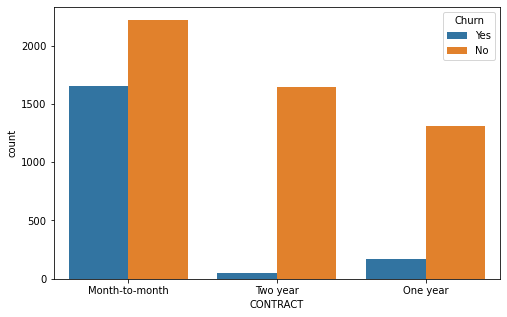

In [170]:
plt.figure(figsize= (8,5))
sns.countplot(df.Contract, hue= df.Churn, )
plt.xlabel('CONTRACT')

In [162]:
churn_df.Contract.value_counts()/churn_df.Contract.shape

Month-to-month    0.885500
One year          0.088818
Two year          0.025682
Name: Contract, dtype: float64

In [114]:
high_value_customers.Contract.value_counts()/high_value_customers.shape[0]

Month-to-month    0.590909
One year          0.296791
Two year          0.112299
Name: Contract, dtype: float64

In [115]:
low_value_customers.Contract.value_counts()/low_value_customers.shape[0]

Month-to-month    0.959197
One year          0.036789
Two year          0.004013
Name: Contract, dtype: float64

### comparing non Churning customers

In [164]:
not_churn_df= pd.read_sql('select * from churn_all where Churn== "No" ',conn)

In [166]:
# Converting TotalCharges to numeric
not_churn_df.TotalCharges.replace(' ','0',inplace= True)    # replacing ' ' with zero

# Now converting datatype ot numeric 
not_churn_df.TotalCharges= pd.to_numeric(not_churn_df.TotalCharges)

In [128]:
not_churn_df.TotalCharges.describe()

count    5174.000000
mean     2549.911442
std      2329.954215
min         0.000000
25%       572.900000
50%      1679.525000
75%      4262.850000
max      8672.450000
Name: TotalCharges, dtype: float64

In [129]:
not_churn_df.TotalCharges.quantile(0.8)

4890.900000000001

In [167]:
# Let's make separate dataframe of CHURNED customers as High value cust. &  Low value cust.
high_value_customers= not_churn_df.query('TotalCharges > 4890 ')

low_value_customers= not_churn_df.query('TotalCharges < 4890 ')

In [132]:
# Comparing Contract of notChurned customers

In [163]:
notchurn_df.Contract.value_counts()/notchurn_df.Contract.shape

Month-to-month    0.429068
Two year          0.318322
One year          0.252609
Name: Contract, dtype: float64

In [133]:
high_value_customers.Contract.value_counts()/ high_value_customers.shape[0]

Two year          0.573359
One year          0.279923
Month-to-month    0.146718
Name: Contract, dtype: float64

In [168]:
low_value_customers.Contract.value_counts()/low_value_customers.shape[0]

Month-to-month    0.499758
Two year          0.254471
One year          0.245771
Name: Contract, dtype: float64

We can conclude that among most valuable customers (top 20% of notChurned customers), 57% of them had 2 Year Contract. While 80%ile of notChurned customers also had 25% each of them having 1Year or 2Year contract.

But, Only Churned Customers had very least of them having 1 or 2 Year Contract. So, Contract is a very important factor affecting Churning rate.

So, from this analysis, we found that people are less likely to churn if they have a 2-year or a 1-year contract as compared with a month-to-month contract.